In [1]:
import pandas as pd
import numpy as np
import math
import logging
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from decimal import Decimal
from matplotlib.colors import BoundaryNorm

from statannotations.Annotator import Annotator

from scipy import stats
import statsmodels.stats.multitest
from decimal import Decimal

from sklearn import preprocessing

import pickle 
from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.precision", 4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

import utils_statistics

In [2]:
dystonia_genetics = pd.read_csv('dataset/genetic_dystonia_pallidal_neuron_activity.csv')
dystonia_genetics = dystonia_genetics[dystonia_genetics.patient!="patient1"] # removing benign-SGCE case

# fill np.nan values with 0
dystonia_genetics = dystonia_genetics.fillna(0)

# these two features can have infinite values due to 0 division problem. while their measurement
dystonia_genetics['pause_index'].replace(np.inf,dystonia_genetics.loc[dystonia_genetics['pause_index'] != np.inf, 'pause_index'].max(),inplace=True)
dystonia_genetics['pause_ratio'].replace(np.inf,dystonia_genetics.loc[dystonia_genetics['pause_ratio'] != np.inf, 'pause_ratio'].max(),inplace=True)

features = dystonia_genetics.columns.to_list()
features.remove('patient')
features.remove('hemisphere')
features.remove('trajectory')
features.remove('depth')
features.remove('spike_pattern')
features.remove('gene')

features_non_param = features.copy()
features_non_param.remove('is_bursting')
features_non_param.remove('is_tonic')
features_non_param.remove('is_irregular')
features_non_param.remove('delta_band_oscillatory')
features_non_param.remove('theta_band_oscillatory')
features_non_param.remove('alpha_band_oscillatory')
features_non_param.remove('beta_band_oscillatory')
features_non_param.remove('gamma_band_oscillatory')
features_non_param.remove('is_oscillatory')

features_binary = list(np.setdiff1d(features,features_non_param))

# 1. AOPEP VS REST

In [4]:
data_AOPEP_vs_Rest         = pd.DataFrame(dystonia_genetics)
data_AOPEP_vs_Rest.gene    = data_AOPEP_vs_Rest.gene.map({'AOPEP':1, 'GNAL'  :0, 'KMT2B':0, 
                                                          'PANK2':0, 'PLA2G6':0, 'SGCE' :0, 
                                                          'THAP1':0, 'TOR1A' :0, 'VPS16':0})

kw_results_AOPEP_vs_Rest   = utils_statistics.nonparametric_population_test(data_AOPEP_vs_Rest, features_non_param)
chi2_results_AOPEP_vs_Rest = utils_statistics.chi_square_test(data_AOPEP_vs_Rest, features_binary) 

stats_AOPEP_vs_Rest                = pd.concat([kw_results_AOPEP_vs_Rest[["biomarker","pvalue"]], chi2_results_AOPEP_vs_Rest[["biomarker","pvalue"]]], ignore_index=True)
effect_size                        = kw_results_AOPEP_vs_Rest.cohens_d_interpretation.tolist()
effect_size.extend(chi2_results_AOPEP_vs_Rest.cramers_v_interpretation.tolist())
stats_AOPEP_vs_Rest["effect_size"] = effect_size
stats_AOPEP_vs_Rest.to_csv("test_results/one-vs-rest/AOPEP_vs_Rest.csv", index=False)
 

# 2. GNAL vs REST

In [6]:
data_GNAL_vs_Rest         = pd.DataFrame(dystonia_genetics)
data_GNAL_vs_Rest.gene    = data_GNAL_vs_Rest.gene.map({'AOPEP':0, 'GNAL'  :1, 'KMT2B':0, 
                                                        'PANK2':0, 'PLA2G6':0, 'SGCE' :0, 
                                                        'THAP1':0, 'TOR1A' :0, 'VPS16':0})

kw_results_GNAL_vs_Rest   = utils_statistics.nonparametric_population_test(data_GNAL_vs_Rest, features_non_param)
chi2_results_GNAL_vs_Rest = utils_statistics.chi_square_test(data_GNAL_vs_Rest, features_binary) 

stats_GNAL_vs_Rest                 = pd.concat([kw_results_GNAL_vs_Rest[["biomarker","pvalue"]], chi2_results_GNAL_vs_Rest[["biomarker","pvalue"]]], ignore_index=True)
effect_size                        = kw_results_GNAL_vs_Rest.cohens_d_interpretation.tolist()
effect_size.extend(chi2_results_GNAL_vs_Rest.cramers_v_interpretation.tolist())
stats_GNAL_vs_Rest["effect_size"]  = effect_size
stats_GNAL_vs_Rest.to_csv("test_results/one-vs-rest/GNAL_vs_Rest.csv", index=False)

# 3. KMT2B vs REST

In [10]:
data_KMT2B_vs_Rest         = dystonia_genetics.copy()
data_KMT2B_vs_Rest.gene    = data_KMT2B_vs_Rest.gene.map({'AOPEP':0, 'GNAL'  :0, 'KMT2B':1, 
                                                          'PANK2':0, 'PLA2G6':0, 'SGCE' :0, 
                                                          'THAP1':0, 'TOR1A' :0, 'VPS16':0})

kw_results_KMT2B_vs_Rest   = utils_statistics.nonparametric_population_test(data_KMT2B_vs_Rest, features_non_param)
chi2_results_KMT2B_vs_Rest = utils_statistics.chi_square_test(data_KMT2B_vs_Rest, features_binary) 

stats_KMT2B_vs_Rest                = pd.concat([kw_results_KMT2B_vs_Rest[["biomarker","pvalue"]], chi2_results_KMT2B_vs_Rest[["biomarker","pvalue"]]], ignore_index=True)
effect_size                        = kw_results_KMT2B_vs_Rest.cohens_d_interpretation.tolist()
effect_size.extend(chi2_results_KMT2B_vs_Rest.cramers_v_interpretation.tolist())
stats_KMT2B_vs_Rest["effect_size"] = effect_size
stats_KMT2B_vs_Rest.to_csv("test_results/one-vs-rest/KMT2B_vs_Rest.csv", index=False)

# 4. PANK2 vs REST

In [13]:
data_PANK2_vs_Rest         = dystonia_genetics.copy()
data_PANK2_vs_Rest.gene    = data_PANK2_vs_Rest.gene.map({'AOPEP':0, 'GNAL'  :0, 'KMT2B':0, 
                                                          'PANK2':1, 'PLA2G6':0, 'SGCE' :0, 
                                                          'THAP1':0, 'TOR1A' :0, 'VPS16':0})

kw_results_PANK2_vs_Rest   = utils_statistics.nonparametric_population_test(data_PANK2_vs_Rest, features_non_param)
chi2_results_PANK2_vs_Rest = utils_statistics.chi_square_test(data_PANK2_vs_Rest, features_binary) 

stats_PANK2_vs_Rest                = pd.concat([kw_results_PANK2_vs_Rest[["biomarker","pvalue"]], chi2_results_PANK2_vs_Rest[["biomarker","pvalue"]]], ignore_index=True)
effect_size                        = kw_results_PANK2_vs_Rest.cohens_d_interpretation.tolist()
effect_size.extend(chi2_results_PANK2_vs_Rest.cramers_v_interpretation.tolist())
stats_PANK2_vs_Rest["effect_size"] = effect_size
stats_PANK2_vs_Rest.to_csv("test_results/one-vs-rest/PANK2_vs_Rest.csv", index=False)

# 5. PLA2G6 vs REST

In [16]:
data_PLA2G6_vs_Rest         = dystonia_genetics.copy()
data_PLA2G6_vs_Rest.gene    = data_PLA2G6_vs_Rest.gene.map({'AOPEP':0, 'GNAL'  :0, 'KMT2B':0, 
                                                            'PANK2':0, 'PLA2G6':1, 'SGCE' :0, 
                                                            'THAP1':0, 'TOR1A' :0, 'VPS16':0})

kw_results_PLA2G6_vs_Rest   = utils_statistics.nonparametric_population_test(data_PLA2G6_vs_Rest, features_non_param)
chi2_results_PLA2G6_vs_Rest = utils_statistics.chi_square_test(data_PLA2G6_vs_Rest, features_binary) 

stats_PLA2G6_vs_Rest                = pd.concat([kw_results_PLA2G6_vs_Rest[["biomarker","pvalue"]], chi2_results_PLA2G6_vs_Rest[["biomarker","pvalue"]]], ignore_index=True)
effect_size                        = kw_results_PLA2G6_vs_Rest.cohens_d_interpretation.tolist()
effect_size.extend(chi2_results_PLA2G6_vs_Rest.cramers_v_interpretation.tolist())
stats_PLA2G6_vs_Rest["effect_size"] = effect_size
stats_PLA2G6_vs_Rest.to_csv("test_results/one-vs-rest/PLA2G6_vs_Rest.csv", index=False)

# 6. SGCE vs REST

In [19]:
data_SGCE_vs_Rest         = dystonia_genetics.copy()
data_SGCE_vs_Rest.gene    = data_SGCE_vs_Rest.gene.map({'AOPEP':0, 'GNAL'  :0, 'KMT2B':0, 
                                                        'PANK2':0, 'PLA2G6':0, 'SGCE' :1, 
                                                        'THAP1':0, 'TOR1A' :0, 'VPS16':0})

kw_results_SGCE_vs_Rest   = utils_statistics.nonparametric_population_test(data_SGCE_vs_Rest, features_non_param)
chi2_results_SGCE_vs_Rest = utils_statistics.chi_square_test(data_SGCE_vs_Rest, features_binary) 

stats_SGCE_vs_Rest                = pd.concat([kw_results_SGCE_vs_Rest[["biomarker","pvalue"]], chi2_results_SGCE_vs_Rest[["biomarker","pvalue"]]], ignore_index=True)
effect_size                        = kw_results_SGCE_vs_Rest.cohens_d_interpretation.tolist()
effect_size.extend(chi2_results_SGCE_vs_Rest.cramers_v_interpretation.tolist())
stats_SGCE_vs_Rest["effect_size"] = effect_size
stats_SGCE_vs_Rest.to_csv("test_results/one-vs-rest/SGCE_vs_Rest.csv", index=False)

# 7. THAP1 vs REST

In [23]:
data_THAP1_vs_Rest         = dystonia_genetics.copy()
data_THAP1_vs_Rest.gene    = data_THAP1_vs_Rest.gene.map({'AOPEP':0, 'GNAL'  :0, 'KMT2B':0, 
                                                          'PANK2':0, 'PLA2G6':0, 'SGCE' :0, 
                                                          'THAP1':1, 'TOR1A' :0, 'VPS16':0})

kw_results_THAP1_vs_Rest   = utils_statistics.nonparametric_population_test(data_THAP1_vs_Rest, features_non_param)
chi2_results_THAP1_vs_Rest = utils_statistics.chi_square_test(data_THAP1_vs_Rest, features_binary) 

stats_THAP1_vs_Rest                = pd.concat([kw_results_THAP1_vs_Rest[["biomarker","pvalue"]], chi2_results_THAP1_vs_Rest[["biomarker","pvalue"]]], ignore_index=True)
effect_size                        = kw_results_THAP1_vs_Rest.cohens_d_interpretation.tolist()
effect_size.extend(chi2_results_THAP1_vs_Rest.cramers_v_interpretation.tolist())
stats_THAP1_vs_Rest["effect_size"] = effect_size
stats_THAP1_vs_Rest.to_csv("test_results/one-vs-rest/THAP1_vs_Rest.csv", index=False)

# 8. TOR1A vs REST

In [26]:
data_TOR1A_vs_Rest         = dystonia_genetics.copy()
data_TOR1A_vs_Rest.gene    = data_TOR1A_vs_Rest.gene.map({'AOPEP':0, 'GNAL'  :0, 'KMT2B':0, 
                                                          'PANK2':0, 'PLA2G6':0, 'SGCE' :0, 
                                                          'THAP1':0, 'TOR1A' :1, 'VPS16':0})

kw_results_TOR1A_vs_Rest   = utils_statistics.nonparametric_population_test(data_TOR1A_vs_Rest, features_non_param)
chi2_results_TOR1A_vs_Rest = utils_statistics.chi_square_test(data_TOR1A_vs_Rest, features_binary) 

stats_TOR1A_vs_Rest                = pd.concat([kw_results_TOR1A_vs_Rest[["biomarker","pvalue"]], chi2_results_TOR1A_vs_Rest[["biomarker","pvalue"]]], ignore_index=True)
effect_size                        = kw_results_TOR1A_vs_Rest.cohens_d_interpretation.tolist()
effect_size.extend(chi2_results_TOR1A_vs_Rest.cramers_v_interpretation.tolist())
stats_TOR1A_vs_Rest["effect_size"] = effect_size
stats_TOR1A_vs_Rest.to_csv("test_results/one-vs-rest/TOR1A_vs_Rest.csv", index=False)

# 9. VPS16 vs REST

In [30]:
data_VPS16_vs_Rest         = dystonia_genetics.copy()
data_VPS16_vs_Rest.gene    = data_VPS16_vs_Rest.gene.map({'AOPEP':0, 'GNAL'  :0, 'KMT2B':0, 
                                                          'PANK2':0, 'PLA2G6':0, 'SGCE' :0, 
                                                          'THAP1':0, 'TOR1A' :0, 'VPS16':1})

kw_results_VPS16_vs_Rest   = utils_statistics.nonparametric_population_test(data_VPS16_vs_Rest, features_non_param)
chi2_results_VPS16_vs_Rest = utils_statistics.chi_square_test(data_VPS16_vs_Rest, features_binary) 

stats_VPS16_vs_Rest                = pd.concat([kw_results_VPS16_vs_Rest[["biomarker","pvalue"]], chi2_results_VPS16_vs_Rest[["biomarker","pvalue"]]], ignore_index=True)
effect_size                        = kw_results_VPS16_vs_Rest.cohens_d_interpretation.tolist()
effect_size.extend(chi2_results_VPS16_vs_Rest.cramers_v_interpretation.tolist())
stats_VPS16_vs_Rest["effect_size"] = effect_size
stats_VPS16_vs_Rest.to_csv("test_results/one-vs-rest/VPS16_vs_Rest.csv", index=False)

# PLOT

In [33]:
stats_OVR                   = pd.DataFrame()
stats_OVR["biomarker"]      = stats_AOPEP_vs_Rest.biomarker
stats_OVR["AOPEP_vs_REST"]  = stats_AOPEP_vs_Rest.effect_size
stats_OVR["GNAL_vs_Rest"]   = stats_GNAL_vs_Rest.effect_size
stats_OVR["KMT2B_vs_Rest"]  = stats_KMT2B_vs_Rest.effect_size
stats_OVR["PANK2_vs_Rest"]  = stats_PANK2_vs_Rest.effect_size
stats_OVR["PLA2G6_vs_Rest"] = stats_PLA2G6_vs_Rest.effect_size
stats_OVR["SGCE_vs_Rest"]   = stats_SGCE_vs_Rest.effect_size
stats_OVR["THAP1_vs_Rest"]  = stats_THAP1_vs_Rest.effect_size
stats_OVR["TOR1A_vs_Rest"]  = stats_TOR1A_vs_Rest.effect_size
stats_OVR["VPS16_vs_Rest"]  = stats_VPS16_vs_Rest.effect_size

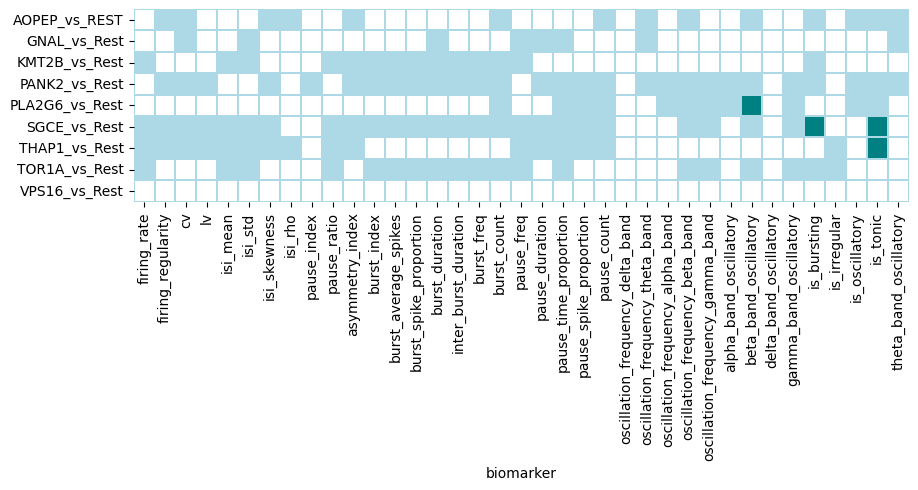

In [122]:
plt.rc('font', serif="Neue Haas Grotesk Text Pro")

fig = plt.figure()
fig.set_size_inches(10, 2.5)

color_code       = pd.DataFrame(stats_OVR)
color_code.index = color_code.biomarker
color_code.drop('biomarker', axis=1, inplace=True) 
    
color_code.replace("large" , 0.8, inplace=True)
color_code.replace("medium", 0.6, inplace=True)
color_code.replace("small" , 0.4, inplace=True)
color_code.replace(np.nan  , 0.2, inplace=True)
color_code = color_code.apply(pd.to_numeric, errors='coerce') # convert all column data types into float
    
color_code = color_code.transpose()

bounds  = [0, 0.25, 0.5, 0.75, 1]
heat_c  = ['white','lightblue', 'teal', 'darkslategray',]
heat_n  = BoundaryNorm(bounds, ncolors=len(heat_c))
sns.heatmap(color_code, vmin=0, vmax=1, cmap=heat_c, norm = heat_n , annot=False, cbar=False,  linewidths=0.25, linecolor='lightblue')

plt.savefig("figures/Supplementary Figure 5.svg", dpi=300)  